# 복습

In [84]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [10]:
# 불러오기 및 df 생성
boston = datasets.load_boston()

boston_df = pd.DataFrame(
    boston['data'],
    columns = boston['feature_names']
)
boston_df['price'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
# 데이터 분할

x = boston_df.drop(columns='price')
y = boston_df['price']

x_tr, x_te, y_tr, y_te = train_test_split(x,y,random_state=0)

In [12]:
# 선형회귀

model = LinearRegression().fit(x_tr, y_tr)

print(f'W:{model.coef_}')
print(f'b:{model.intercept_}')

W:[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
b:36.93325545711978


In [13]:
# 모델 성능 평가
print('trianing score : ', model.score(x_tr,y_tr))
print('testing score : ', model.score(x_te, y_te))

trianing score :  0.7697699488741149
testing score :  0.6354638433202124


# 다항회귀

In [6]:
# x0 특성을 2차항으로 변환(단일변수)
p = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1,1)
pd.DataFrame(p.fit_transform(x),columns=p.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [7]:
# x0,x1 특성을 2차항으로 변환(다변수)
p = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1,2)
pd.DataFrame(p.fit_transform(x),columns=p.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [14]:
# 위의 보스턴을 2차항 다항회귀로 분석
p = PolynomialFeatures(degree=2, include_bias=False)
x_poly = p.fit_transform(x)
column = p.get_feature_names_out()
pd.DataFrame(x_poly,columns=column)

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(x_poly,y,random_state=0)

# 선형회귀

model = LinearRegression().fit(x_tr, y_tr)

# 모델 성능 평가
print('trianing score : ', model.score(x_tr,y_tr))
print('testing score : ', model.score(x_te, y_te))
# tr_score는 크게 증가했으나, 막상 te_score는 감소함. => 과적합

trianing score :  0.952051960903273
testing score :  0.6074721959725392


In [15]:
# 위의 보스턴을 3차항 다항회귀로 분석
p = PolynomialFeatures(degree=3, include_bias=False)
x_poly = p.fit_transform(x)
column = p.get_feature_names_out()
pd.DataFrame(x_poly,columns=column)

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(x_poly,y,random_state=0)

# 선형회귀

model = LinearRegression().fit(x_tr, y_tr)

# 모델 성능 평가
print('trianing score : ', model.score(x_tr,y_tr))
print('testing score : ', model.score(x_te, y_te))
# tr_score는 크게 증가했으나, 막상 te_score는 더 감소함. => 과적합

trianing score :  1.0
testing score :  -9443.834174676314


In [16]:
# 위의 보스턴을 5차항 다항회귀로 분석
p = PolynomialFeatures(degree=5, include_bias=False)
x_poly = p.fit_transform(x)
column = p.get_feature_names_out()
pd.DataFrame(x_poly,columns=column)

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(x_poly,y,random_state=0)

# 선형회귀

model = LinearRegression().fit(x_tr, y_tr)

# 모델 성능 평가
print('trianing score : ', model.score(x_tr,y_tr))
print('testing score : ', model.score(x_te, y_te))
# tr_score는 크게 증가했으나, 막상 te_score는 더 감소함. => 과적합

trianing score :  1.0
testing score :  -135.30506302849497


## 규제화(Regulation)

차수가 높아질수록 과적합 발생 => 성능저하  
과적합 방지를 위해 가중치 크기 제어  
기존 비용함수에 규제(penalty)를 추가하여 가중치 크기 제어  

### 규제모델
Ridge Regulation - L2 규제 가중치 => 더 완만한 곡선으로 변화  
MSE가 최소가 되게하는 동시에, 가중치들의 제곱 합이 최소가 되도록 하는 적절한 가중치와 편향을 찾음.  
Lasso Regulation - L1 규제 가중치 => 일부 점을 무시  
MSE가 최소가 되게하는 동시에, 가중치들의 제곱 합이 최소가 되도록 하는 적절한 가중치와 편향을 찾음.  
규제 효과로 가중치가 0이 되거나 수렴해야함.  
모델에서 가장 중요한 특성이 두드러져 모델 해석력이 좋아짐  
Elastic Regulation - L1 + L2 규제 가중치  

In [21]:
# 보스턴 ridge 규제화 실습

# 데이터 정규화 및 준비
p = PolynomialFeatures(degree=5, include_bias=False)
x_sclaed = MinMaxScaler().fit_transform(x)
x_poly = p.fit_transform(x_sclaed)

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(x_poly,y,random_state=0)

# 선형회귀
model = Ridge(alpha=1).fit(x_tr, y_tr)

# 모델 성능 평가
print('trianing score : ', model.score(x_tr,y_tr))
print('testing score : ', model.score(x_te, y_te))

# 과적합 해소 됨.

trianing score :  0.9529484269152196
testing score :  0.8111753209671624


In [49]:
#규제 강도에 따른 성능 비교. => 10의 배수

# 규제강도 0.1

# 선형회귀
Ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
Ridge01_coef = pd.Series(Ridge01.coef_, index=boston['feature_names'])

# 규제강도 0.1

# 선형회귀
Ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
Ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

# 규제강도 10

# 선형회귀
Ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
Ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

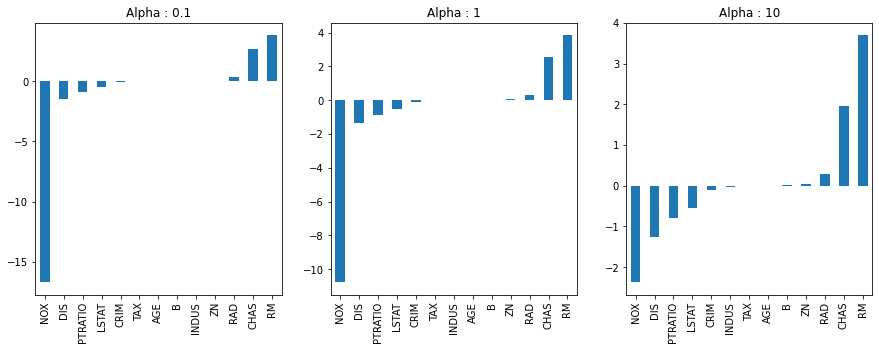

In [50]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
Ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
Ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
Ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

In [51]:
# 보스턴 Lasso 규제화 실습

# 데이터 정규화 및 준비
p = PolynomialFeatures(degree=5, include_bias=False)
x_sclaed = MinMaxScaler().fit_transform(x)
x_poly = p.fit_transform(x_sclaed)

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(x_poly,y,random_state=0)

# 선형회귀
model = Lasso(alpha=1).fit(x_tr, y_tr)

# 모델 성능 평가
print('trianing score : ', model.score(x_tr,y_tr))
print('testing score : ', model.score(x_te, y_te))

# 과적합 해소 됨.

trianing score :  0.2929003871909833
testing score :  0.21305559861136192


## Feature Engineering

기법  
더미  
Lable encoding - 문자를 숫자로 치환하는 방법 : 숫자의 대소관계 특성이 작용하는 단점  
One-Hot encoding - 특성값에 따라 새로운 특성 추가하는 방법 => 열을 새로 만들어 해당 값은 1, 나머지는 0  
변형  
스케일링  
차원축소  
비닝  

In [66]:
one_hot_df = pd.DataFrame({
    'number':[0,2,2,1],
    'string':['A',"B",'C','D']
})
one_hot_df

,number,string
0,0,A
1,2,B
2,2,C
3,1,D


In [67]:
pd.get_dummies(one_hot_df)

,number,string_A,string_B,string_C,string_D
0,0,1,0,0,0
1,2,0,1,0,0
2,2,0,0,1,0
3,1,0,0,0,1


In [69]:
pd.get_dummies(one_hot_df[['number','string']])

,number,string_A,string_B,string_C,string_D
0,0,1,0,0,0
1,2,0,1,0,0
2,2,0,0,1,0
3,1,0,0,0,1


In [70]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [78]:
# one hot encoding
tips_ohe = pd.get_dummies(tips, columns=['sex','smoker','day','time'])

# 분할
y= tips_ohe['tip']
x= tips_ohe.drop(columns='tip')

In [81]:
# 훈련, 평가 데이터로 분리

x_tr,t_te,y_tr,y_te = train_test_split(
    x,y,random_state=0
)

# 선형회귀

model = LinearRegression().fit(x_tr,y_tr)

# 성능 검사
print(model.score(x_tr,y_tr), model.score(x_te,y_te))

ValueError: X has 8567 features, but LinearRegression is expecting 12 features as input.

## Logistic Regression 로지스틱 회귀

회귀이지만, 분류용 => 확률(0 ~ 1) 회귀  
선형 : y = Wx + b => -inp ~ inp  
P(확률) : ax + b => 0 ~ 1 : -inp ~ inp 범위를 맞춰야함.  

확률 -> odds로 변환    
odds : 실패 확률 대비 성공확률(P(성공)/1-P)  
ex) 5번중 1번 성공, 4번 실패 => 1/4  

P/(1-P) : ax + b => 0 ~ inp : -inp ~ inp 좌극한 범위를 맞춰야함.  
limlog(0) = - inp임을 이용.  

log(P/(1-P)) = ax + b => -inp ~ inp  
==> H = log(P/(1-P)) =ax + b
==> P = 1/(1+e^-(ax + b))

cost 함수 : cross entropy(U모양)
cost 함수가 최소가 되는 W를 찾기(미분값, 경사하강법과 같은 원리)

이항분류

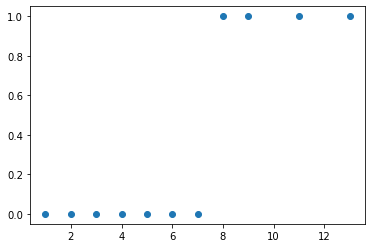

In [82]:
x = np.array([1,2,3,4,5,6,7,8,9,11,13])
y = np.array([0,0,0,0,0,0,0,1,1,1,1])

plt.scatter(x,y)
plt.show()

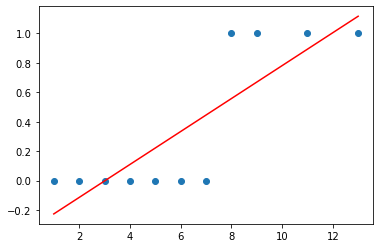

In [83]:
# 선형회귀 모델
model = LinearRegression().fit(x.reshape(-1,1),y)
plt.scatter(x,y)
plt.plot(x, model.predict(x.reshape(-1,1)),c='red')
plt.show()
# 0~1 범위(합격률 0%~100%)가 아니므로 부적합한 모델

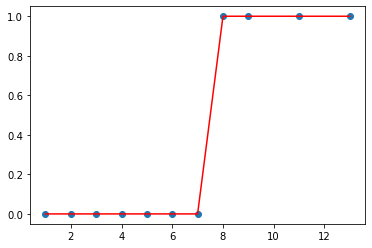

In [85]:
# 로지스틱 회귀 모델
model = LogisticRegression().fit(x.reshape(-1,1),y)
plt.scatter(x,y)
plt.plot(x, model.predict(x.reshape(-1,1)),c='red')
plt.show()
# 0~1 범위 회귀 모델에 적절함.

In [113]:
# 위스콘신 유방암 진단
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_tr, x_te, y_tr, y_te = train_test_split(
    cancer['data'],
    cancer['target'],
    stratify=cancer['target'],
    random_state=0
)

model = LogisticRegression(max_iter=10000).fit(x_tr,y_tr)  # 최솟값이 나올 수 있는 최대 범위를 지정, 최솟값 나오면 반복 정지.
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.9671361502347418, 0.9370629370629371)

In [114]:
# 모델
from sklearn.neighbors import KNeighborsClassifier
model_KN = KNeighborsClassifier().fit(x_tr, y_tr)
print(model_KN.score(x_tr, y_tr), model_KN.score(x_te, y_te), )

0.9460093896713615 0.916083916083916


In [115]:
model.predict(x_te)[:5]

array([1, 0, 0, 1, 0])

In [116]:
model.predict_proba(x_te)[:5]

array([[1.36938746e-02, 9.86306125e-01],
       [9.99981942e-01, 1.80584058e-05],
       [9.99993953e-01, 6.04687109e-06],
       [3.95555904e-04, 9.99604444e-01],
       [9.99525081e-01, 4.74918989e-04]])

In [117]:
model.decision_function(x_te)[:5]

array([  4.27701816, -10.92188123, -12.01596355,   7.8348228 ,
        -7.65189129])

In [169]:
# 타이타닉 생존율
import seaborn as sns
ti = sns.load_dataset("titanic")
ti["age"] = ti["age"].fillna( ti["age"].mean() )
#
y = ti["survived"]
X = ti[["age","pclass","sibsp","parch"]]
#
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0, stratify=y
)
# 모델'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

# 모델'
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier().fit(x_tr, y_tr)
print(model_kn.score(x_tr, y_tr), model_kn.score(x_te, y_te), )

,age,pclass,sibsp,parch
0,22.000000,3,1,0
1,38.000000,1,1,0
2,26.000000,3,0,0
3,35.000000,1,1,0
4,35.000000,3,0,0
...,...,...,...,...
886,27.000000,2,0,0
887,19.000000,1,0,0
888,29.699118,3,1,2
889,26.000000,1,0,0


In [130]:
# 손글씨 데이터셋
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [132]:
print(digits['images'][1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


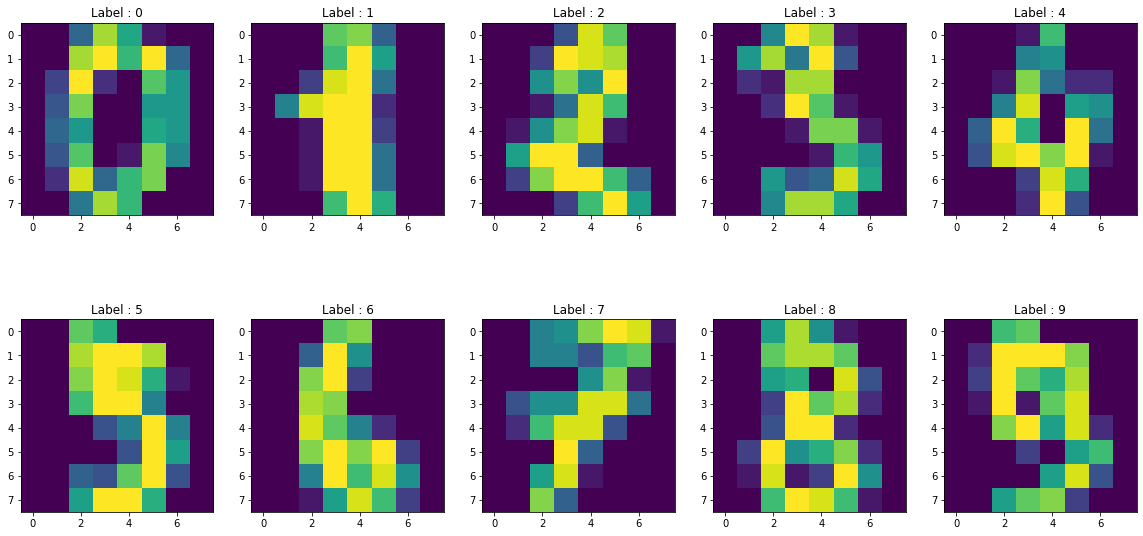

In [135]:
plt.figure(figsize=(20,10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2,5,index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [136]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

## 분류분석 성능평가

In [158]:
# 이진 분류를 위한 데이터세트 준비
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, Y = cancer['data'], cancer['target']

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [159]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

In [160]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

KNN 정확도 : 97.20%
Logistic Regression 정확도 : 96.50%
Decision Tree 정확도 : 93.01%
Random Forest 정확도 : 96.50%
Gradient Boosting 정확도 : 97.90%
SVM 정확도 : 96.50%
MLP 정확도 : 95.80%


In [161]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.04255319, 1.        ]),
 array([0.        , 0.97916667, 1.        ]),
 array([2, 1, 0]))

In [162]:
# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

0.9683067375886525

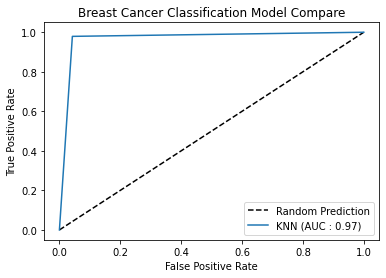

In [163]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

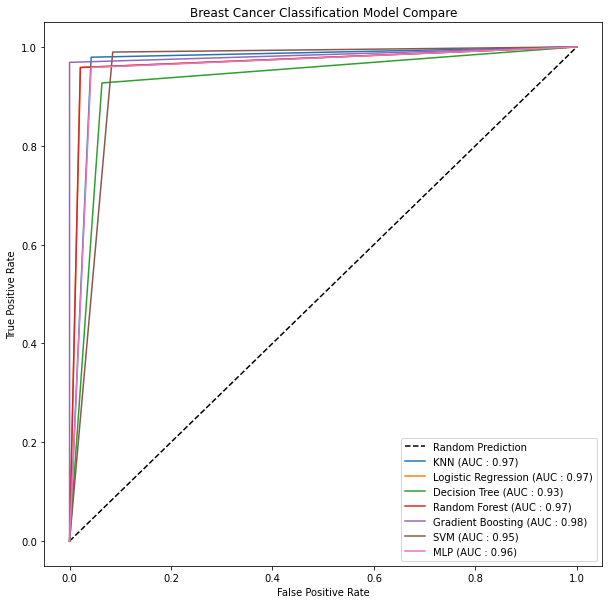

In [164]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

KNN 정확도 : 77.58%
Logistic Regression 정확도 : 77.58%
Decision Tree 정확도 : 79.82%
Random Forest 정확도 : 79.82%
Gradient Boosting 정확도 : 78.48%
SVM 정확도 : 65.92%
MLP 정확도 : 80.27%


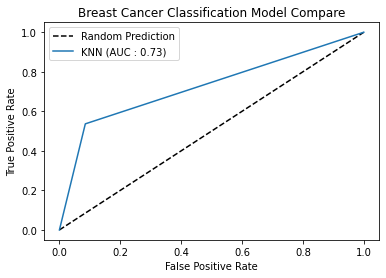

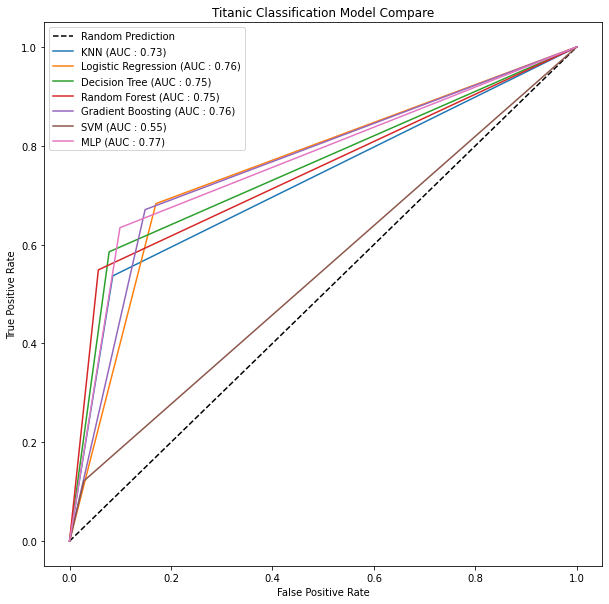

In [181]:
# 타이타닉 데이터셋의 알고리즘별 분류분석 평가해보기

# 이진 분류를 위한 데이터세트 준비
import seaborn as sns
ti = sns.load_dataset("titanic")

ti["age"] = ti["age"].fillna( ti["age"].mean() )
ti = pd.get_dummies(ti, columns=['sex','embarked','class'])

Y = ti["survived"]
X = ti[["age","pclass","sibsp","parch",'sex_female' ,'sex_male','embarked_C' ,'embarked_Q','embarked_S','class_First','class_Second','class_Third']]

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()